In [2]:
from nilearn import image
from nilearn import plotting
img = image.load_img("data/sub-NDARDN702GXX_task-rest_bold.nii.gz")
print(img.shape)

(78, 78, 54, 420)


We can retrieve the first volume (note that Python indexing starts at 0):



In [3]:
first_rsn = image.index_img(img, 0)
print(first_rsn.shape)

(78, 78, 54)


first_rsn is a 3D image.

We can then plot it



/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


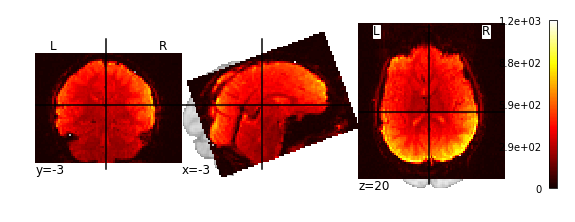

In [4]:
plotting.plot_stat_map(first_rsn)

Looping on all volumes in a 4D file
-----------------------------------

If we want to plot all the volumes in this 4D file, we can use iter_img
to loop on them.

Then we give a few arguments to plot_stat_map in order to have a more
compact display.



/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be c

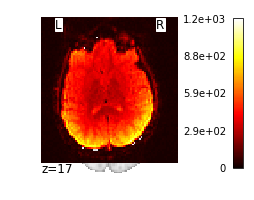

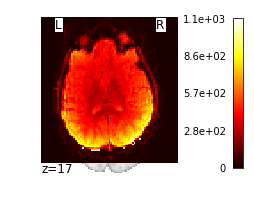

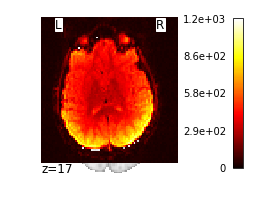

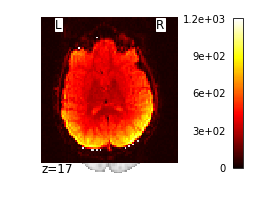

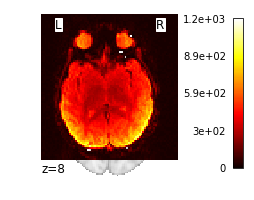

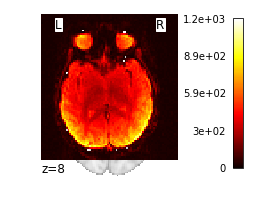

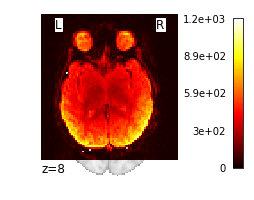

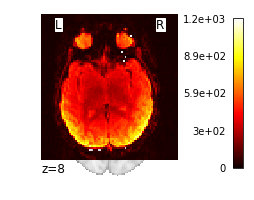

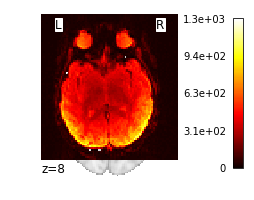

In [7]:
for i in range(0, 420, 50):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(image.index_img(img, i), threshold=3, display_mode="z", cut_coords=1,
                           colorbar=True)

plotting.show is useful to force the display of figures when running
outside IPython



In [ ]:
plotting.show()

|

______

To recap, neuroimaging images (niimgs as we call them) come in
different flavors:

* 3D images, containing only one brain volume
* 4D images, containing multiple brain volumes.

More details about the input formats in nilearn for 3D and 4D images is
given in the documentation section: `loading_data`.

Functions accept either 3D or 4D images, and we need to use on the one
hand :func:`nilearn.image.index_img` or :func:`nilearn.image.iter_img`
to break down 4D images into 3D images, and on the other hand
:func:`nilearn.image.concat_imgs` to group a list of 3D images into a 4D
image.

